<h1>Tabla de contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#ANALISIS-EXPLORATORIO-DE-DATOS" data-toc-modified-id="ANALISIS-EXPLORATORIO-DE-DATOS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ANALISIS EXPLORATORIO DE DATOS</a></span><ul class="toc-item"><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></li><li><span><a href="#Prueba-de-hipotesis" data-toc-modified-id="Prueba-de-hipotesis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prueba de hipotesis</a></span><ul class="toc-item"><li><span><a href="#Conclusion-de-hipotesis" data-toc-modified-id="Conclusion-de-hipotesis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion de hipotesis</a></span></li></ul></li></ul></div>

## Introducción

Estamos trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tenemos la tarea de encontrar patrones en la información disponible comprendiendo las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Contamos con una base de datos con los datos de los competidores permitiendo probar una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

- tabla neighborhoods: datos sobre los barrios de la ciudad
    -  name: nombre del barrio
    -  neighborhood_id: código del barrio

- tabla cabs: datos sobre los taxis
    - cab_id: código del vehículo
    - vehicle_id: ID técnico del vehículo
    - company_name: la empresa propietaria del vehículo

- tabla trips: datos sobre los viajes
    - trip_id: código del viaje
    - cab_id: código del vehículo que opera el viaje
    - start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
    - end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
    - duration_seconds: duración del viaje en segundos
    - distance_miles: distancia del viaje en millas
    - pickup_location_id: código del barrio de recogida
    - dropoff_location_id: código del barrio de finalización

- tabla weather_records: datos sobre el clima
    - record_id: código del registro meteorológico
    - ts: fecha y hora del registro (tiempo redondeado a la hora)
    - temperature: temperatura cuando se tomó el registro
    - description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

## ANALISIS EXPLORATORIO DE DATOS

- Importamos las librerias necesarias

In [1]:
import pandas
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

- Estudiamos los datos que contienen

Leemos el archivo de datasets

In [2]:
df_sql_01= pandas.read_csv('/datasets/project_sql_result_01.csv')
df_sql_04=pandas.read_csv('/datasets/project_sql_result_04.csv')
df_sql_07= pandas.read_csv('/datasets/project_sql_result_07.csv')

Comprobamos la informacion de cada datasets

In [3]:
print('project_sql_result_01')
df_sql_01.info()
print()
print('Los valores duplicados en este DataFrame son',df_sql_01.duplicated().sum())
df_sql_01.describe()

project_sql_result_01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Los valores duplicados en este DataFrame son 0


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
print('project_sql_result_04')
df_sql_04.info()
print()
print('Los valores duplicados en este DataFrame son',df_sql_04.duplicated().sum())
df_sql_04.describe()

project_sql_result_04
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Los valores duplicados en este DataFrame son 0


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [5]:
print('project_sql_result_07')
df_sql_07.info()

project_sql_result_07
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Observamos que la columna 'start_ts' es de tipo object(string), lo convertiremos en tipo time

In [6]:
df_sql_07['start_ts'] = pandas.to_datetime(df_sql_07['start_ts'],format='%Y.%m.%d %H:%M:%S')

df_sql_07.info()
print()
print('Los valores duplicados en este DataFrame son',df_sql_07.duplicated().sum())
df_sql_07.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB

Los valores duplicados en este DataFrame son 197


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Podemos observar que en el DataFrame 'df_sql_07' tiene 197 filas duplicadas. Daremos una vista aun más de cerca

In [7]:
print(df_sql_07[df_sql_07.duplicated()])

                start_ts weather_conditions  duration_seconds
62   2017-11-11 06:00:00               Good            1260.0
74   2017-11-11 08:00:00               Good            1380.0
76   2017-11-04 09:00:00               Good            1380.0
117  2017-11-11 07:00:00               Good            1380.0
119  2017-11-04 14:00:00               Good            3300.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


In [8]:
df_sql_07=df_sql_07.drop_duplicates()
print(df_sql_07[df_sql_07.duplicated()])
print('Los valores duplicados en este DataFrame son',df_sql_07.duplicated().sum())

Empty DataFrame
Columns: [start_ts, weather_conditions, duration_seconds]
Index: []
Los valores duplicados en este DataFrame son 0


- Identificamos los 10 principales barrios en términos de finalización.

In [9]:
top_dropoff_neighborhoods=df_sql_04.sort_values(by='average_trips',ascending=False).head(10)
top_dropoff_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


- Graficamos los 10 principales barrios en términos de finalización.

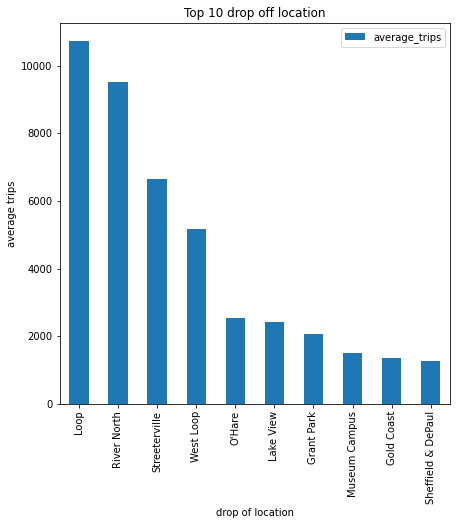

In [10]:
top_dropoff_neighborhoods.plot(kind='bar',x='dropoff_location_name',y='average_trips',figsize=(7,7),title='Top 10 drop off location',xlabel='drop of location',ylabel='average trips')
plt.show()

- Graficos de las 10 empresas de taxis con mayor número de viajes. 

In [11]:
top_company_taxi=df_sql_01.sort_values(by='trips_amount',ascending=False).head(10)
top_company_taxi

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


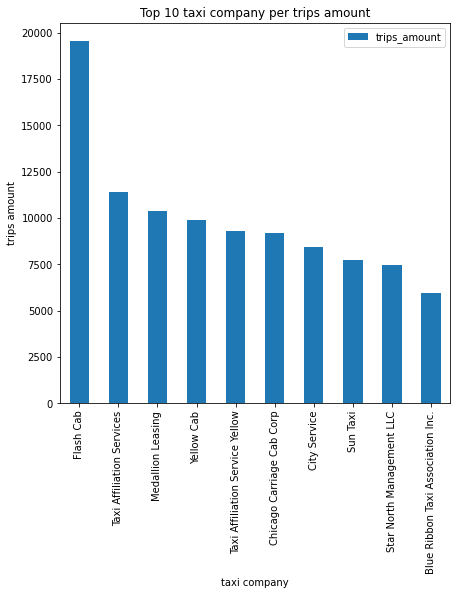

In [12]:
top_company_taxi.plot(kind='bar',x='company_name',y='trips_amount',figsize=(7,7),title='Top 10 taxi company per trips amount',xlabel='taxi company',ylabel='trips amount')
plt.show()

### Conclusiones

- Top 10 drop off location: Podemos concluir que el promedio de los viajes que finalizan en los barrios del grafico son similares en los primeros 5, luego reciben una caida considerable que podemos visualizar en el grafico que no alcanza ni la mitad del promedio de viajes del barrio 'West Loop'.

- Top 10 taxi company per trips amount: La compañia 'Flash cab' supera por mucho en viajes a las demas compañia, casi duplicando a la compañia que lo sigue en la lista.

## Prueba de hipotesis

- ¿La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos?.

El dataset 'project_sql_result_07.csv' contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. En otras palabras cuando 'weather_conditions' obtendremos 2 poblaciones, una cuando el 'weather_conditions' es 'Good' y otra poblacion cuando es 'Bad'(días con lluvia).

Primero comprobaremos que los datos del dataset son todos de dias sabados.

In [13]:
for i in range(len(df_sql_07)):
    if(df_sql_07.iloc[i]['start_ts'].weekday()!=5):
        print('Otro día')

Realizamos una condicion que si el dia de la semana es diferente a 5(Sabado), escriba 'Otro día', pero como no se escribío dicha cadena podemos entender que todos los datos pertenecen al clima de un dia sabado.

Comenzamos a separar las poblaciones.

In [14]:
#Definimos alpha con un nivel de significancia de 0.05
alpha = 0.05
#Obtenemos nuestras poblaciones
condition_good=df_sql_07[df_sql_07['weather_conditions']=='Good']
condition_bad=df_sql_07[df_sql_07['weather_conditions']=='Bad']
results = st.ttest_ind(condition_good['duration_seconds'],condition_bad['duration_seconds'],equal_var=False)

print('valor p:', results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 9.126383933880083e-08
Rechazamos la hipótesis nula


In [15]:
print('Informacion de los viajes con condiciones climaticas buenas')
condition_good.describe()

Informacion de los viajes con condiciones climaticas buenas


,duration_seconds
count,723.000000
mean,2032.253112
std,773.444860
min,0.000000
25%,1435.500000
50%,1883.000000
75%,2491.500000
max,7440.000000


In [16]:
print('Informacion de los viajes con condiciones climaticas lluviosas')
condition_bad.describe()

Informacion de los viajes con condiciones climaticas lluviosas


,duration_seconds
count,148.000000
mean,2409.229730
std,751.544705
min,480.000000
25%,1746.000000
50%,2463.500000
75%,2940.000000
max,4980.000000


### Conclusion de hipotesis

Declaramos que si las varianzas de las poblaciones estadísticas de las que se toman las muestras son aproximadamente iguales (lo declaramos con el parametro 'equal_var=False').

Como rechazamos la hipotesis nula podemos determinar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare si cambia los días sábados lluviosos ya que no son iguales a los días soleados.